# Stack Overflow High Quality Post Classification Using XGBoost Classifier
![a.jpeg](https://ih1.redbubble.net/image.1754286411.0930/st,small,507x507-pad,600x600,f8f8f8.jpg)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer

# Reading the Dataset

In [2]:
data = pd.read_csv("train.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [3]:
dataa = pd.read_csv("valid.csv")
dataa.head()

Id                                              Title  \
0  34552974  How to get all the child records from differen...   
1  34554721  Retrieve all except some data of the another t...   
2  34555135                                  Pandas: read_html   
3  34555448                           Reader Always gimme NULL   
4  34555752    php rearrange array elements based on condition   

                                                Body  \
0  I am having 4 different tables like \r\nselect...   
1  I have two table m_master and tbl_appointment\...   
2  <p>I'm trying to extract US states from wiki U...   
3  I'm so new to C#, I wanna make an application ...   
4  basically i have this array:\r\n\r\n    array(...   

                                     Tags         CreationDate        Y  
0                       <sql><sql-server>  2016-01-01 01:44:52  LQ_EDIT  
1  <php><mysql><sql><codeigniter><mysqli>  2016-01-01 08:43:50  LQ_EDIT  
2                        <python><pandas>  2016-01-01 09:55:22       HQ  
3                    <sql-server><c#-4.0>  2016-01-01 10:43:45  LQ_EDIT  
4                                   <php>  2016-01-01 11:34:09  LQ_EDIT

In [4]:
print(data.shape)
print(dataa.shape)

(45000, 6)
(15000, 6)


# Dropping Useless columns for Both the dataset

In [5]:
data = data.drop(['Id', 'Tags', 'CreationDate'], axis=1)
data.head()

Title  \
0             Java: Repeat Task Every Random Seconds   
1                  Why are Java Optionals immutable?   
2  Text Overlay Image with Darkened Opacity React...   
3         Why ternary operator in swift is so picky?   
4                 hide/show fab with scale animation   

                                                Body         Y  
0  <p>I'm already familiar with repeating tasks e...  LQ_CLOSE  
1  <p>I'd like to understand why Java 8 Optionals...        HQ  
2  <p>I am attempting to overlay a title over an ...        HQ  
3  <p>The question is very simple, but I just cou...        HQ  
4  <p>I'm using custom floatingactionmenu. I need...        HQ

In [6]:
dataa = dataa.drop(['Id', 'Tags', 'CreationDate'], axis=1)
dataa.head()

Title  \
0  How to get all the child records from differen...   
1  Retrieve all except some data of the another t...   
2                                  Pandas: read_html   
3                           Reader Always gimme NULL   
4    php rearrange array elements based on condition   

                                                Body        Y  
0  I am having 4 different tables like \r\nselect...  LQ_EDIT  
1  I have two table m_master and tbl_appointment\...  LQ_EDIT  
2  <p>I'm trying to extract US states from wiki U...       HQ  
3  I'm so new to C#, I wanna make an application ...  LQ_EDIT  
4  basically i have this array:\r\n\r\n    array(...  LQ_EDIT

# Target Variable Plot

In [7]:
import plotly.express as px
fig = px.histogram(data, x="Y")
fig.show()

In [8]:
fig = px.histogram(dataa, x="Y")
fig.show()

# Labeling the Target Column

In [9]:
data['Y'] = data['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})
dataa['Y'] = dataa['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2})

In [10]:
data.head()

Title  \
0             Java: Repeat Task Every Random Seconds   
1                  Why are Java Optionals immutable?   
2  Text Overlay Image with Darkened Opacity React...   
3         Why ternary operator in swift is so picky?   
4                 hide/show fab with scale animation   

                                                Body  Y  
0  <p>I'm already familiar with repeating tasks e...  0  
1  <p>I'd like to understand why Java 8 Optionals...  2  
2  <p>I am attempting to overlay a title over an ...  2  
3  <p>The question is very simple, but I just cou...  2  
4  <p>I'm using custom floatingactionmenu. I need...  2

In [11]:
dataa.head()

Title  \
0  How to get all the child records from differen...   
1  Retrieve all except some data of the another t...   
2                                  Pandas: read_html   
3                           Reader Always gimme NULL   
4    php rearrange array elements based on condition   

                                                Body  Y  
0  I am having 4 different tables like \r\nselect...  1  
1  I have two table m_master and tbl_appointment\...  1  
2  <p>I'm trying to extract US states from wiki U...  2  
3  I'm so new to C#, I wanna make an application ...  1  
4  basically i have this array:\r\n\r\n    array(...  1

# Merging the Body and Title column for Both datasets

In [12]:
data['text'] = data['Title'] + ' ' + data['Body']
data = data.drop(['Title', 'Body'], axis=1)
data.head()

Y                                               text
0  0  Java: Repeat Task Every Random Seconds <p>I'm ...
1  2  Why are Java Optionals immutable? <p>I'd like ...
2  2  Text Overlay Image with Darkened Opacity React...
3  2  Why ternary operator in swift is so picky? <p>...
4  2  hide/show fab with scale animation <p>I'm usin...

In [13]:
dataa['text'] = dataa['Title'] + ' ' + dataa['Body']
dataa = dataa.drop(['Title', 'Body'], axis=1)
dataa.head()

Y                                               text
0  1  How to get all the child records from differen...
1  1  Retrieve all except some data of the another t...
2  2  Pandas: read_html <p>I'm trying to extract US ...
3  1  Reader Always gimme NULL I'm so new to C#, I w...
4  1  php rearrange array elements based on conditio...

# Cleaning Text

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^(a-zA-Z)\s]','', text)
    return text
data['text'] = data['text'].apply(clean_text)
dataa['text'] = dataa['text'].apply(clean_text)

In [19]:
data.sample(10)

Y                                               text
33165  0  python bringing two list elements together pi ...
18424  0  using jquery to manipulate entire html dom pis...
43065  1  mysql dont repaet i have in the table a field ...
44901  0  why is intword program only prining first ten ...
1017   0  best way to handle data for several options c ...
16467  2  virtmanager guest resize not working pinstalle...
759    1  php  ranking on array value without ties i hav...
8880   2  stream object directly into a stdstring pgiven...
8924   1  c delet a item form a listbox using double cli...
26769  1  how to change  shortcut back to if else statem...

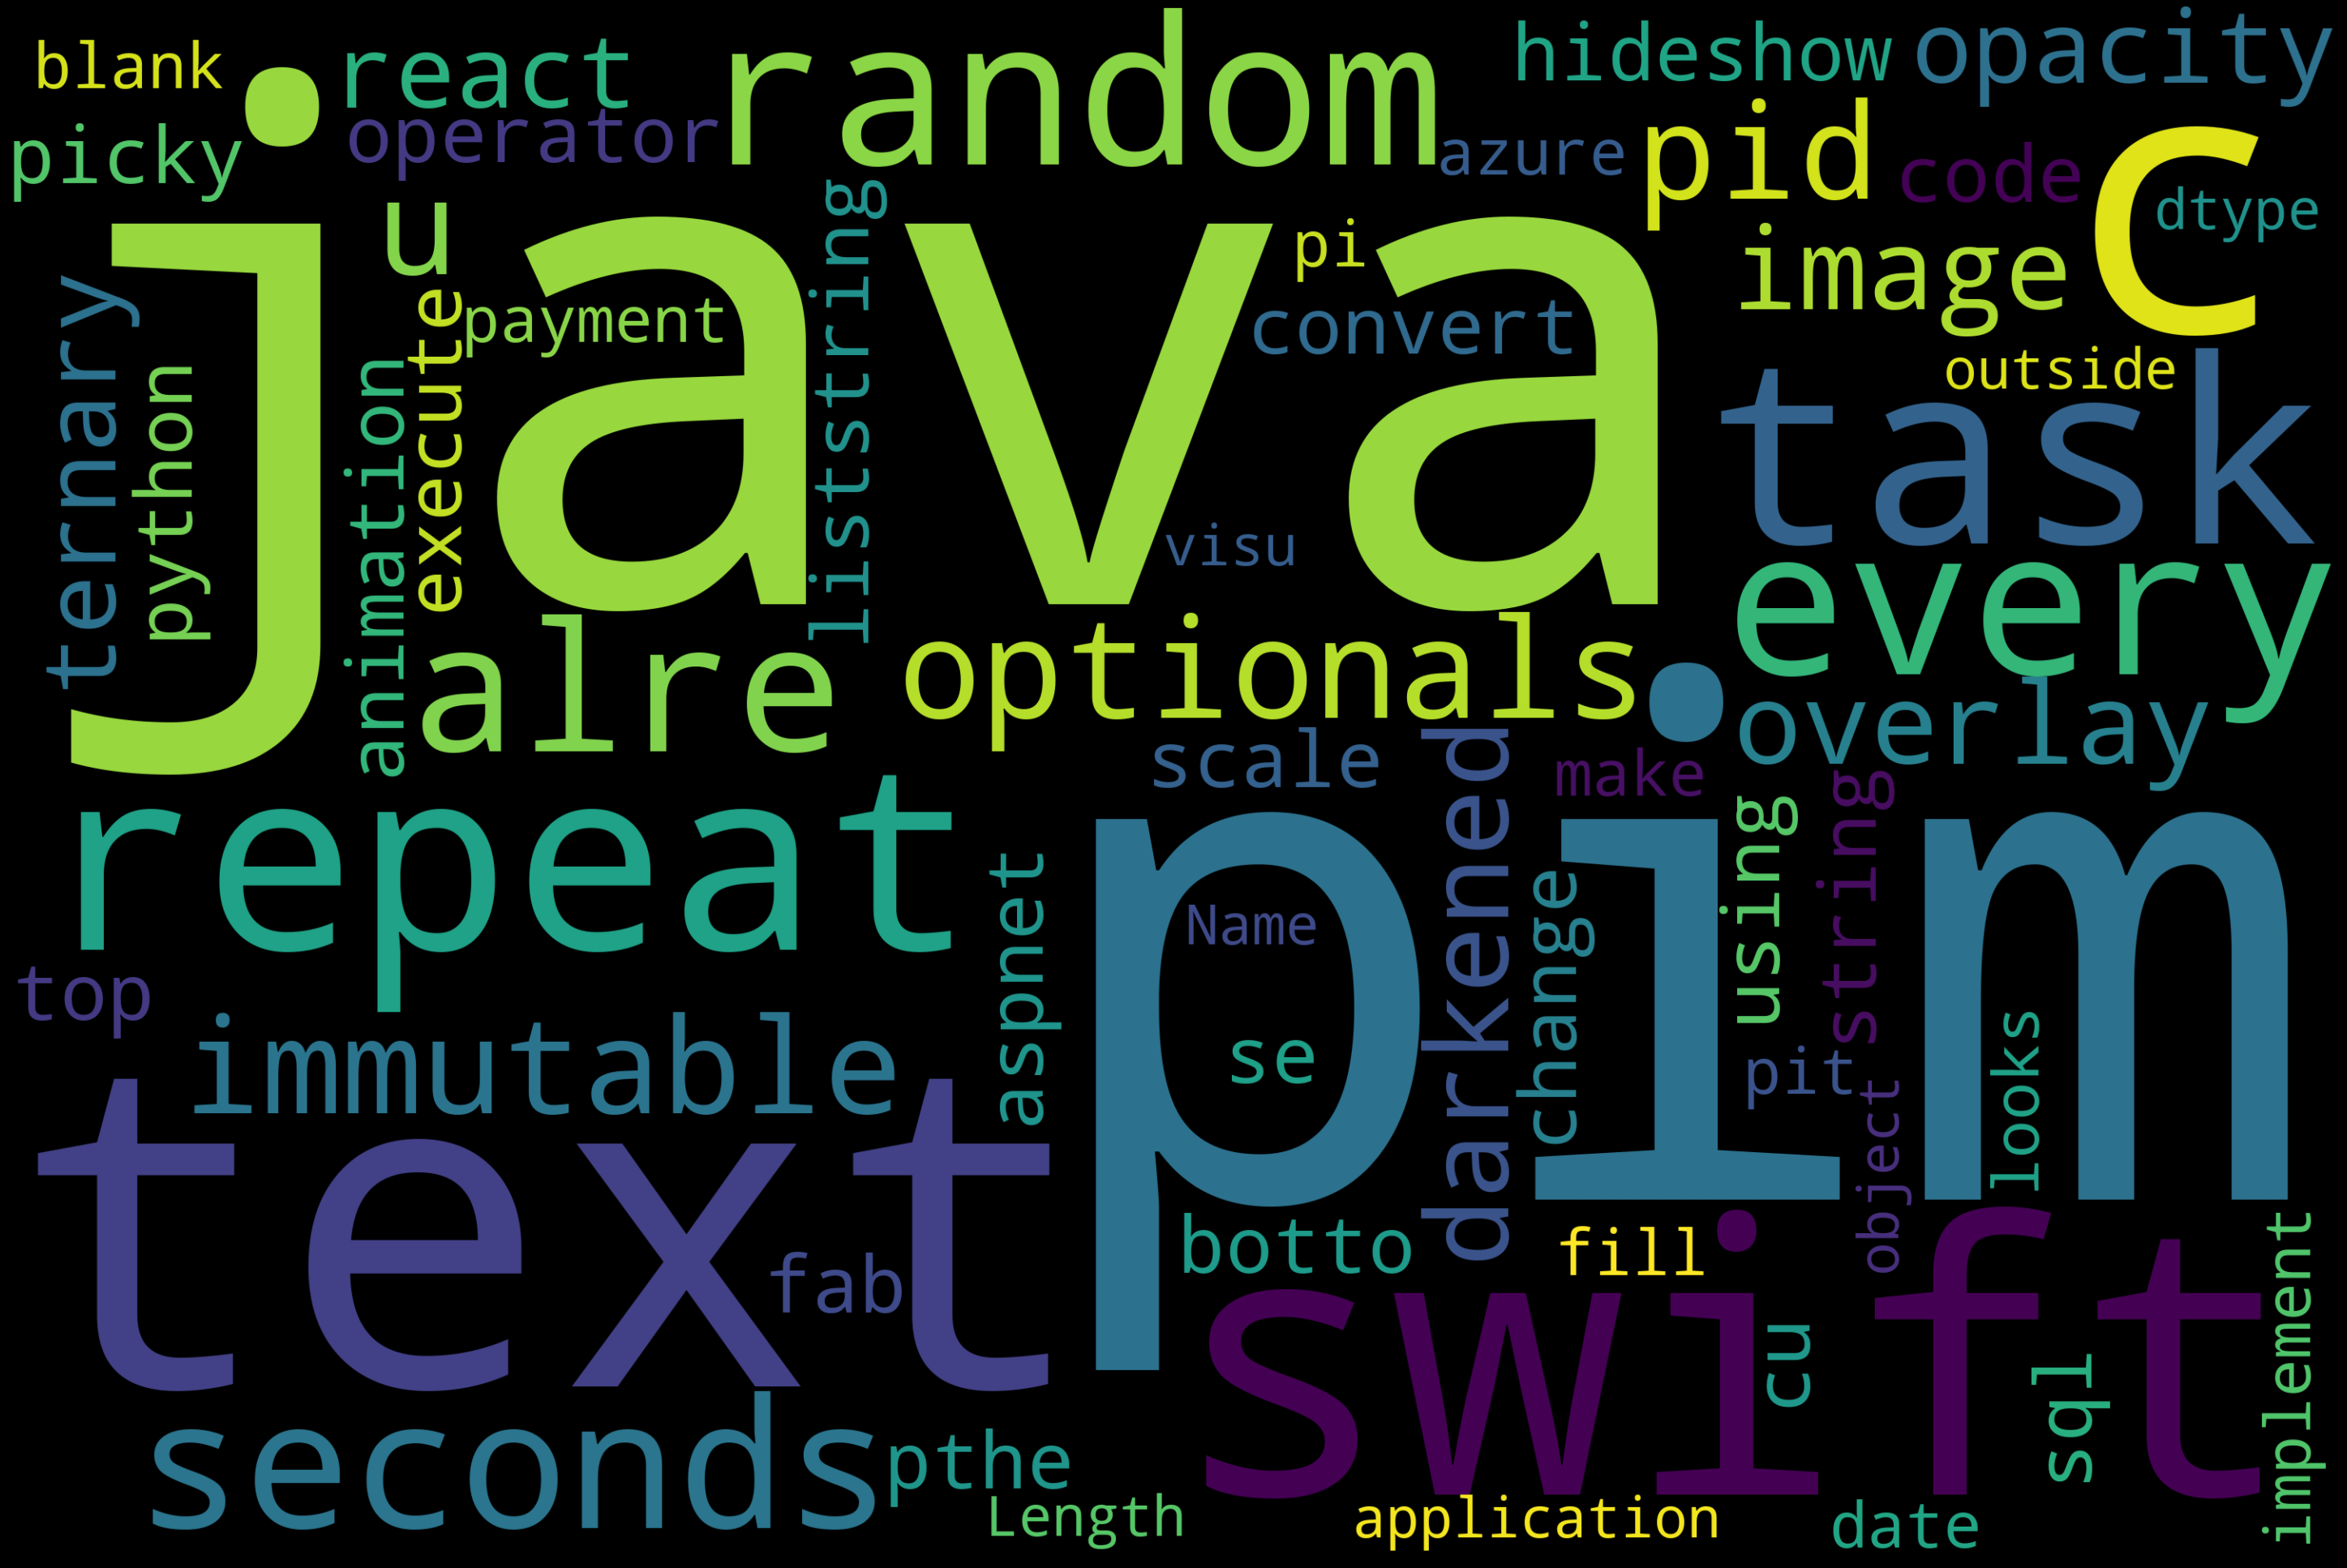

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data.text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
dataa.sample(10)

Y                                               text
14112  0  how to move add document to the top of the lib...
10671  2  how can i change permission of mounted volumes...
11093  2  chrome extension persistent pi am trying to le...
9541   1  spring dependency injection when number of cun...
247    2  does tensorflow by default use all available g...
10547  0  how can design a dynamic seat planner pim work...
333    0  reducing background image opacity in one div p...
5820   0  split string based on a delimeter in sql serve...
10102  1  my code gives keyerror    \r\nmy code\r\n\r\n ...
9694   0  reorder array of objects in specific order pi ...

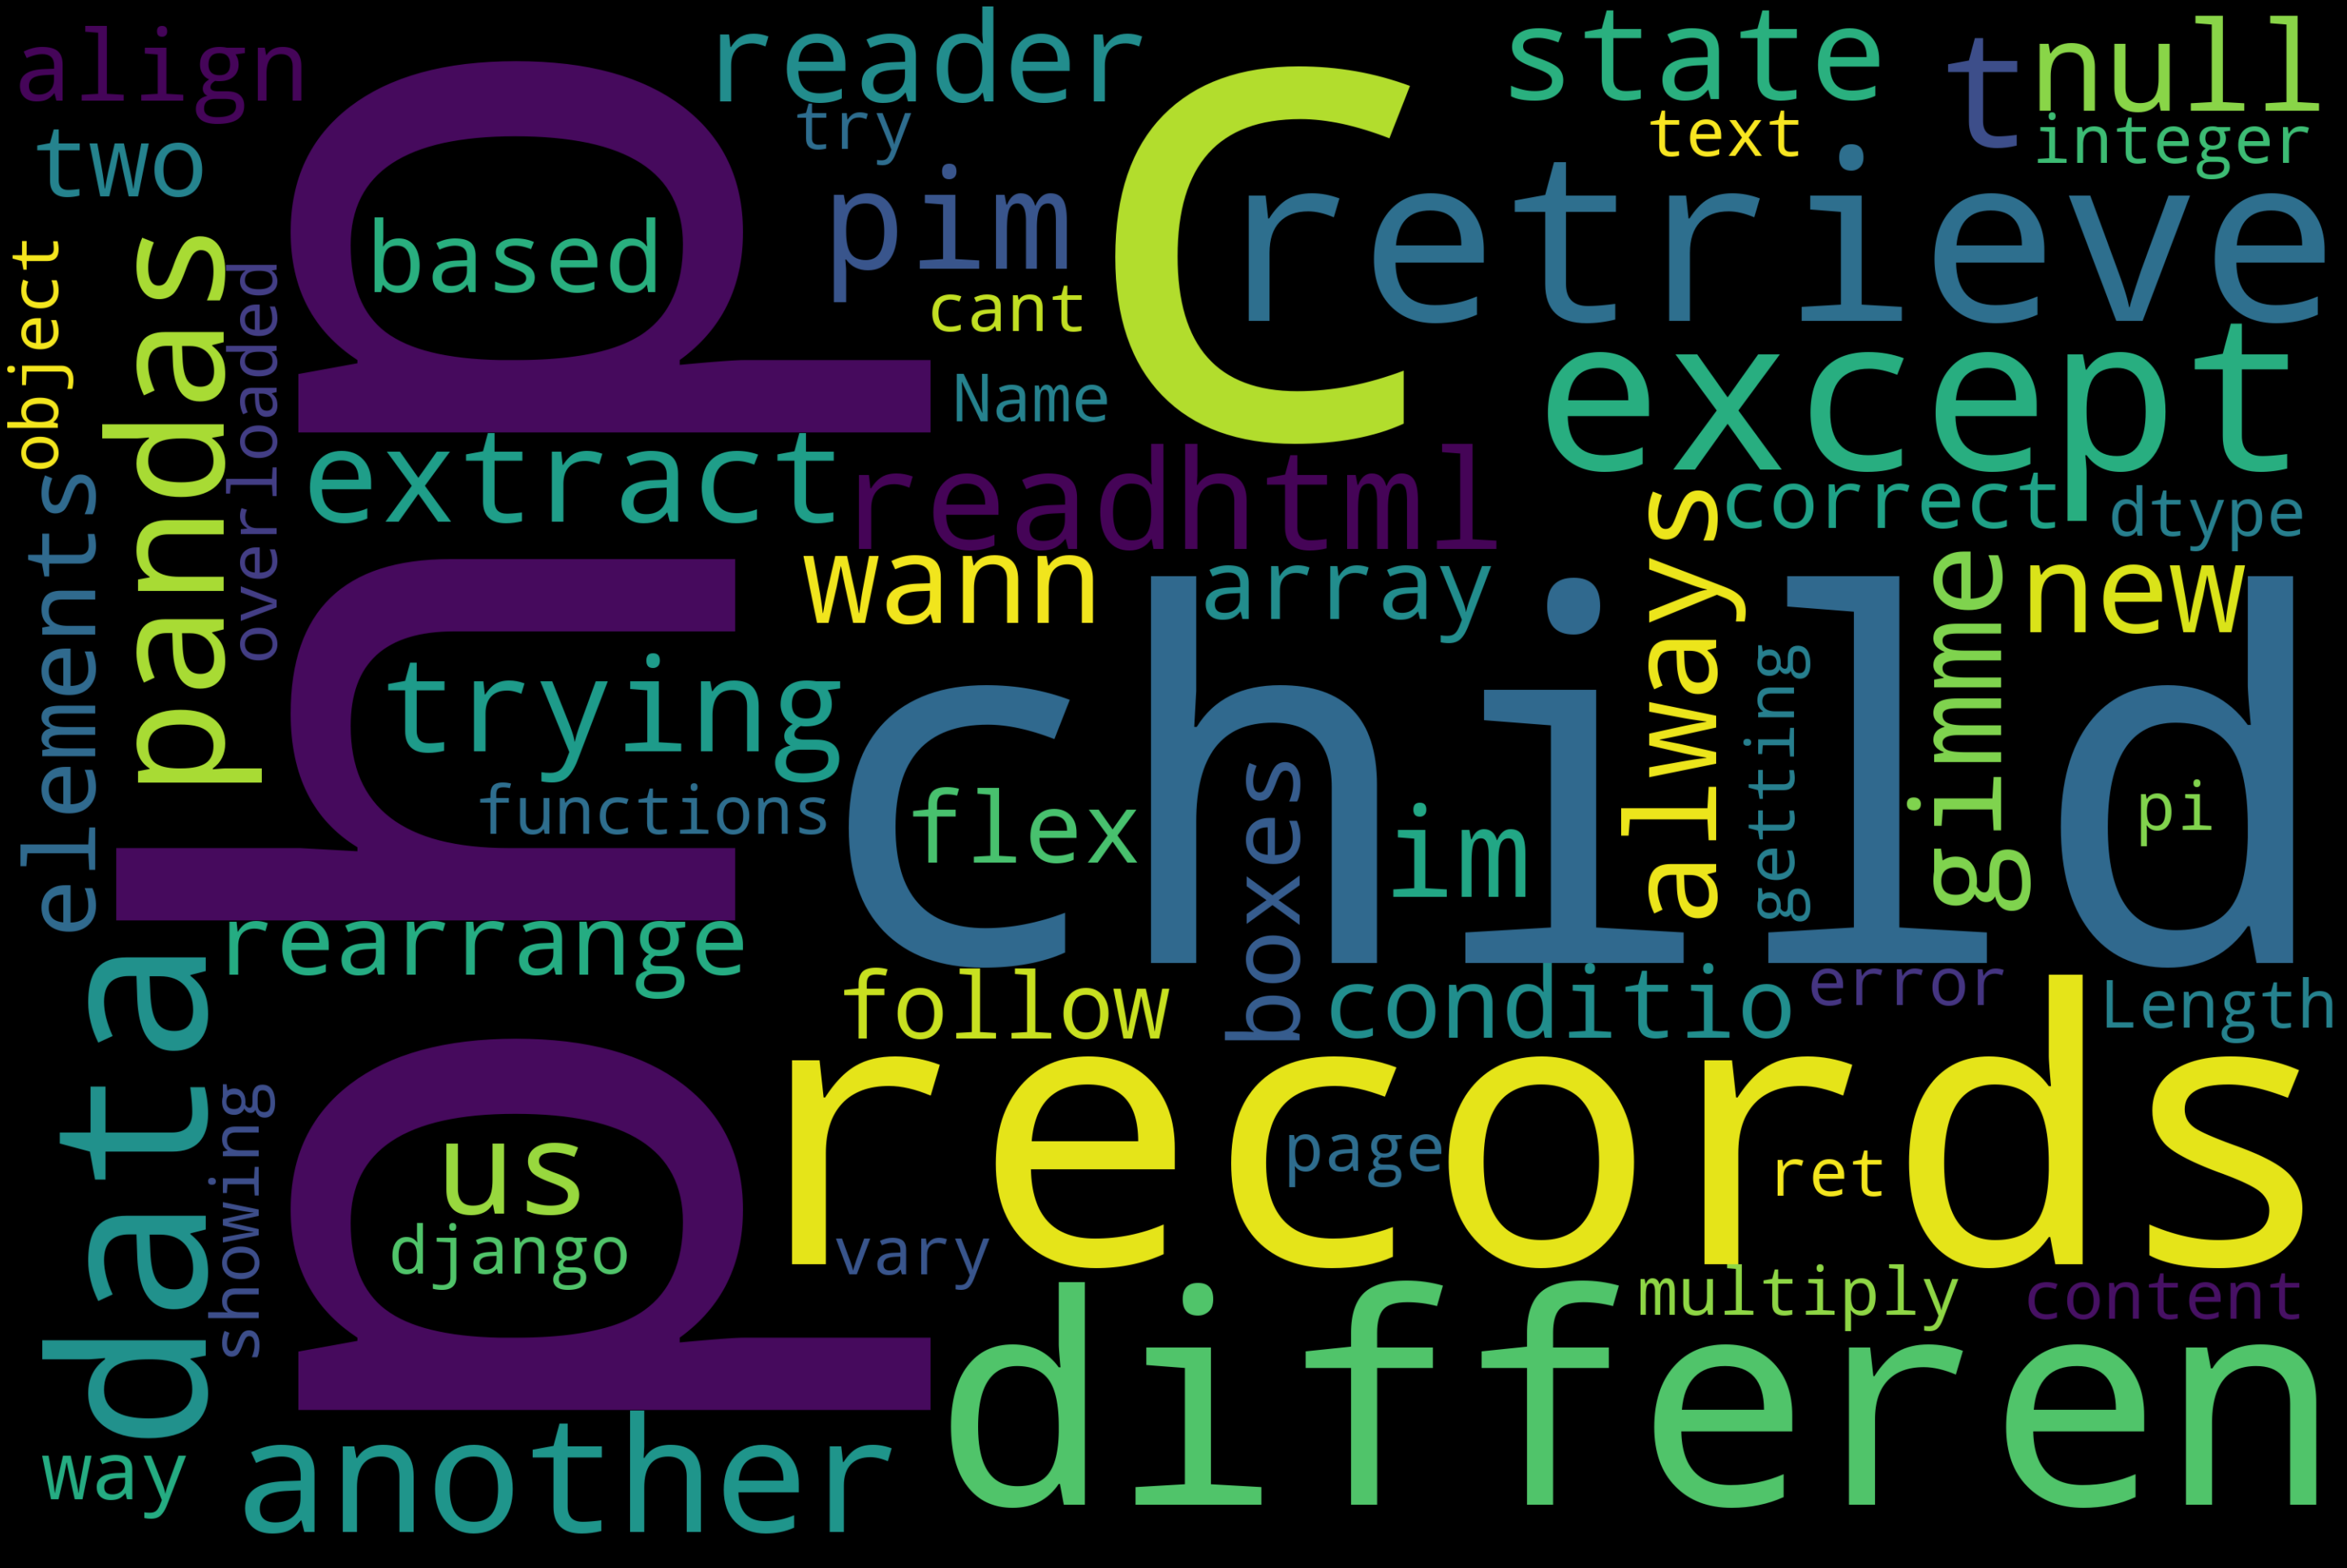

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = dataa.text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Train Test Split

In [23]:
train = data
X_train = train['text']
y_train = train['Y'].values

# Validation Sets
valid = dataa
X_test = valid['text']
y_test = valid['Y'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45000,) (45000,)
(15000,) (15000,)


# TF IDF Vectorizer

In [24]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(trainX)
X_test = vectorizer.transform(validX)

# XGBoost Classifier

In [25]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Predict on Test Set

In [27]:
y_pred = xg.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 0, 2], dtype=int64)

# Predict vs Actual Data

In [29]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [1 1]
 [0 0]
 [2 0]]


# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4160  198  642]
 [  16 4975    9]
 [ 886   79 4035]]


<AxesSubplot:>

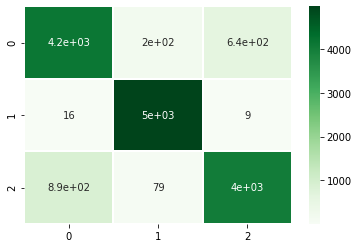

In [35]:
import seaborn as sns
sns.heatmap(cm, annot = True, linewidth=1, cmap='Greens')

# Accuracy

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.880001203012


# Classification Report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      5000
           1       0.95      0.99      0.97      5000
           2       0.86      0.81      0.83      5000

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



# This Model can Successfully Predict High Quality and Low Quality Post of Stack Overflow with an Accuracy of 88%